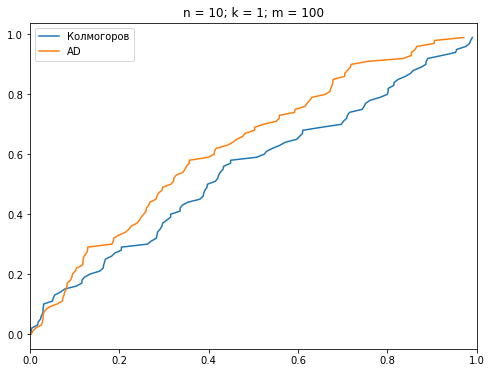

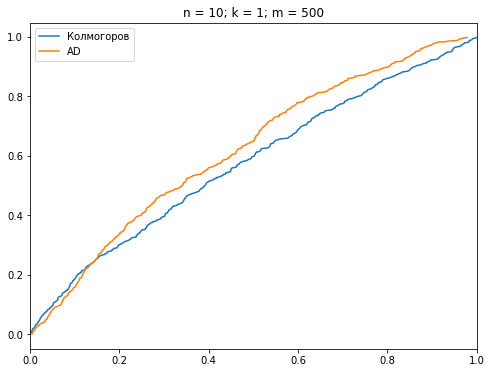

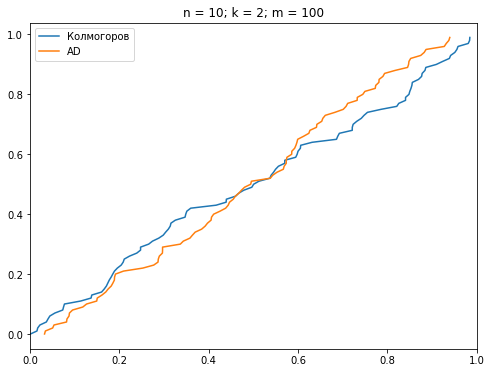

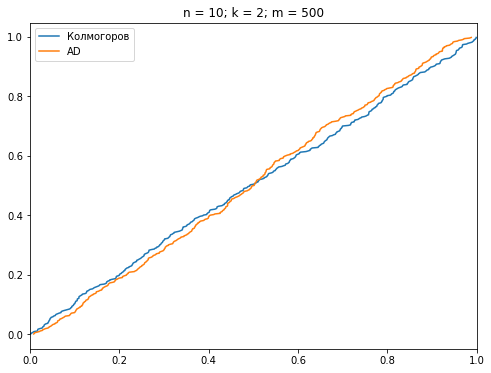

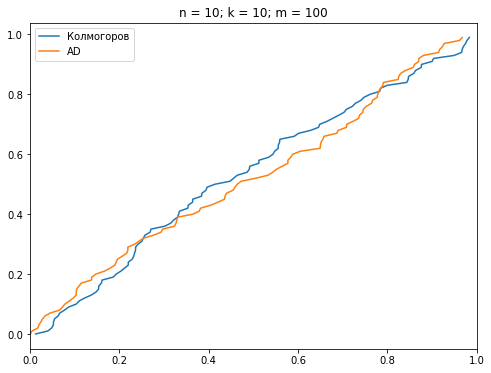

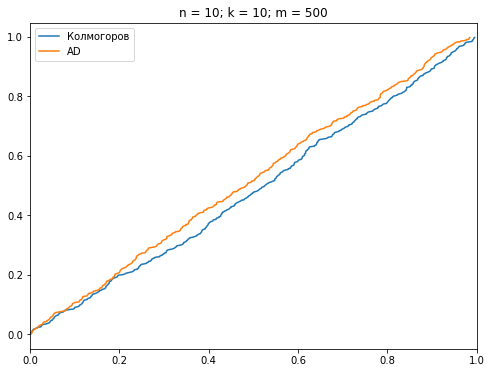

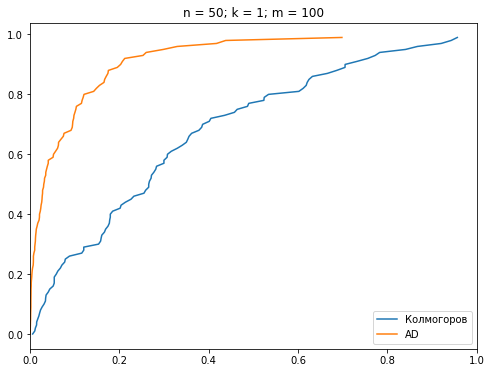

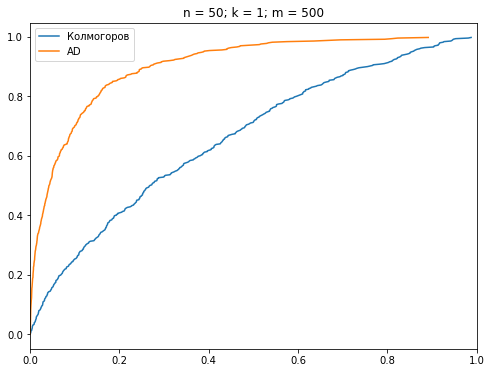

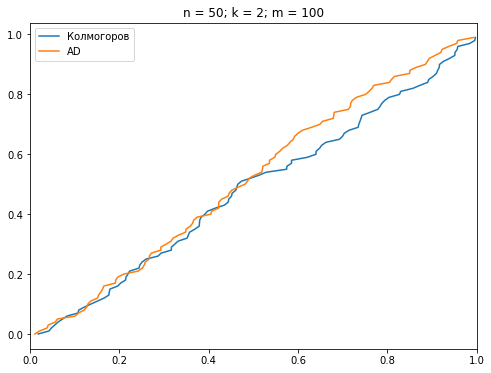

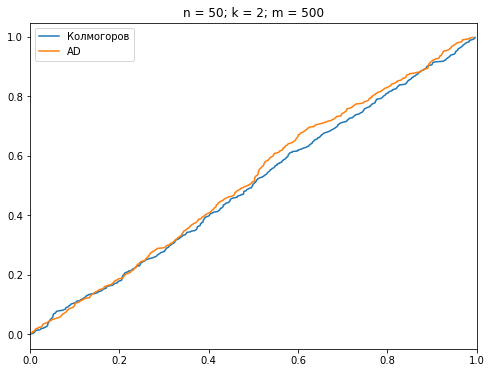

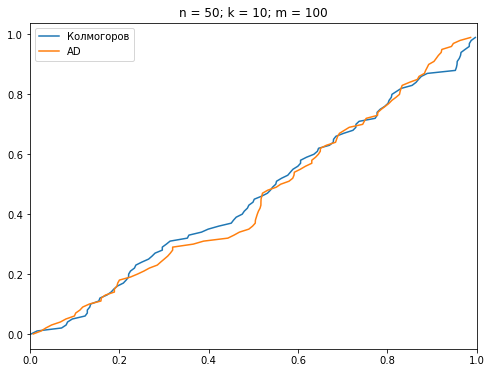

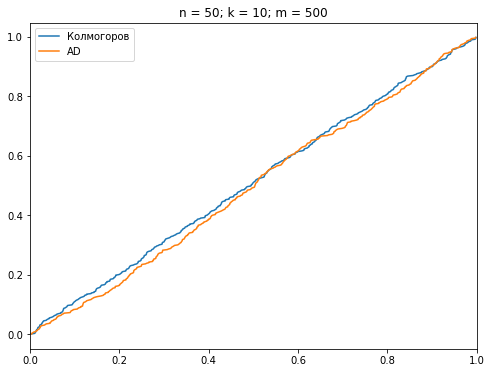

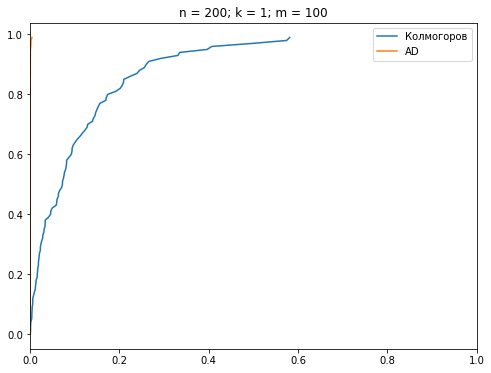

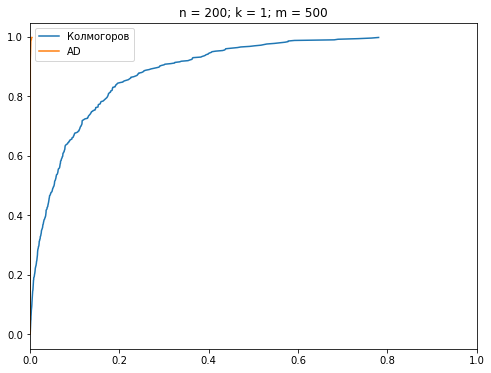

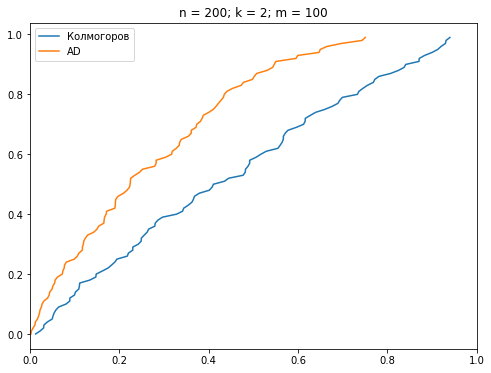

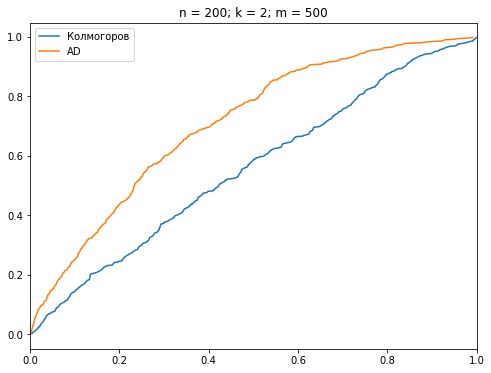

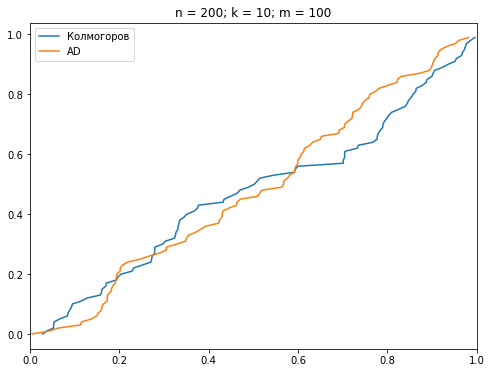

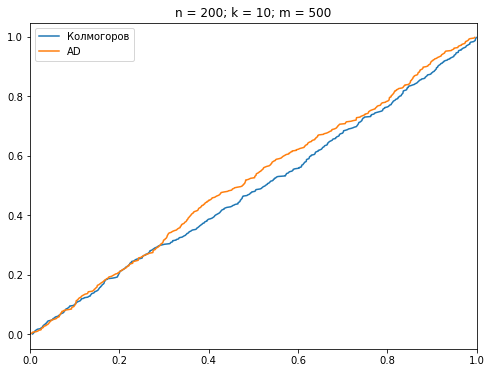

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
k=[1,2,10]
n=[10, 50, 200]
m=[100,500]
for l in range(len(n)):
    for j in range(len(k)):
        for  i in range(len(m)):
            p1=[]
            p2=[]
            for s in range(m[i]):
                x=[]
                for h in range(n[l]):
                        y = sc.uniform.rvs(size = k[j])
                        x.append((np.sum(y)-(k[j]/2))/np.sqrt(k[j]/12))
                p1.append(sc.kstest(x,sc.norm.cdf).pvalue)
                AD = anderson(x, 'norm').statistic*(1+0.75/n[l]+2.25/(n[l])**2)
                p = 0
                if (AD >= 0.6): 
                    p = np.exp(1.2937 - 5.709*(AD)+ 0.0186*(AD)**2)
                if (0.34 < AD < 0.6):
                    p = np.exp(0.9177 - 4.279*(AD) - 1.38*(AD)**2)
                if (0.2 < AD < 0.34):
                    p = 1 - np.exp(-8.318 + 42.796*(AD)- 59.938*(AD)**2)
                if (AD <= 0.2):
                    p = 1 - np.exp(-13.436 + 101.14*(AD)- 223.73*(AD)**2)
                p2.append(p)
            p1.sort()
            p2.sort()
            x1 = np.arange(0,1,1/m[i])
            plt.figure( figsize= (8,6))
            plt.title("n = "+str(n[l])+"; k = "+str(k[j])+"; m = "+str(m[i]))
            plt.plot(list(map(lambda x1: p1[int(x1*m[i])], x1)),x1 ,label = ("Колмогоров"))
            plt.plot(list(map(lambda x1: p2[int(x1*m[i])], x1)),x1 ,label = ("AD"))
            plt.xlim(0,1)
            plt.legend()